<a href="https://colab.research.google.com/github/capitallatera/Stat-and-ML/blob/main/EDA_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('/content/drive/MyDrive/DataSet_Main/HouseData.csv')

In [5]:
df.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Analysis Sales Price

In [8]:
# Descriptive statistics summary
df['SalePrice'].describe()    

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- If mean and median are same in the dataset means
there is no outliers

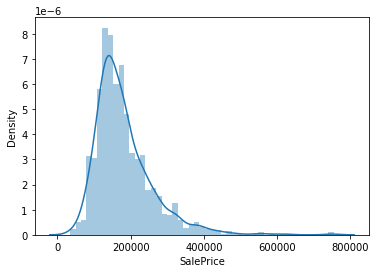

In [9]:
# Histogram 
sns.distplot(df['SalePrice'])

- Normarl Distribution


In [10]:
# Skewness an d kurtosis
print('Skewness: %f' % df['SalePrice'].skew())
print('Kurtosis: %f' % df['SalePrice'].skew())

Skewness: 1.882876
Kurtosis: 1.882876


- If skewness is zero means dataset has no skewed point
- It ranges from 0 to 10

Relationships

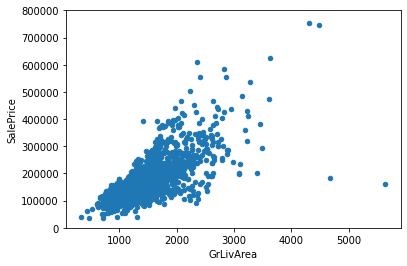

In [11]:
# Scatter plot grlivarea/saleprice
var='GrLivArea'
data=pd.concat([df['SalePrice'],df[var]],axis=1)       #another way of making dataframe
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

- For removing Outliers
  - If value is greater than 4000 then remove row

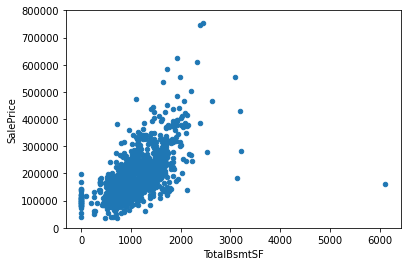

In [12]:
# Scatter plot totalbsmtsf/saleprice
var='TotalBsmtSF'
data=pd.concat([df['SalePrice'],df[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

Relationship with categorical variables

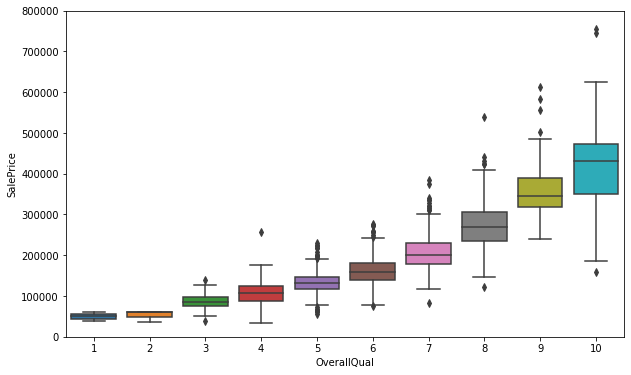

In [7]:
# Box plot overallqual/saleprice
var='OverallQual'
data=pd.concat([df['SalePrice'],df[var]],axis=1)
f,ax=plt.subplots(figsize=(10,6))
fig=sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000);

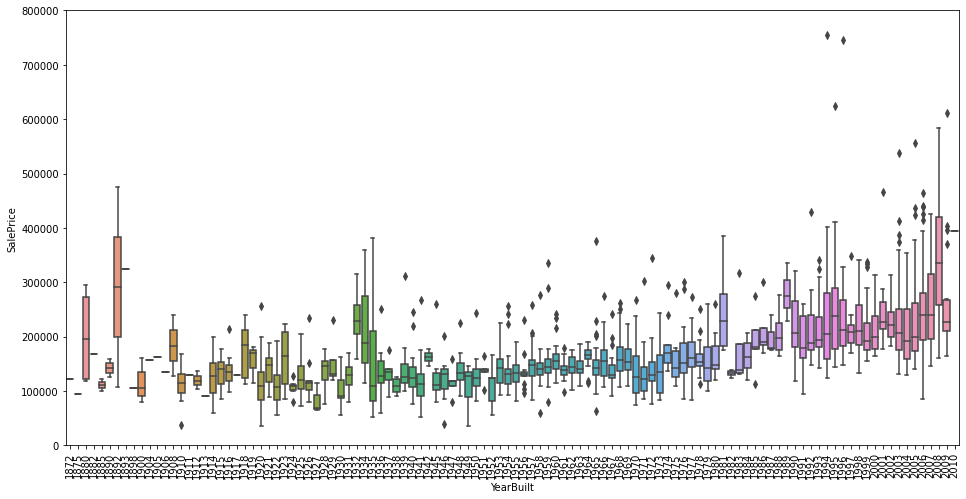

In [9]:
var='YearBuilt'
data=pd.concat([df['SalePrice'],df[var]],axis=1)
f,ax=plt.subplots(figsize=(16,8))
fig=sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90);

- The Dataset which is not able to visualize correctly alternate method is use tableau and powerBI for better and clear illustration

Correlation

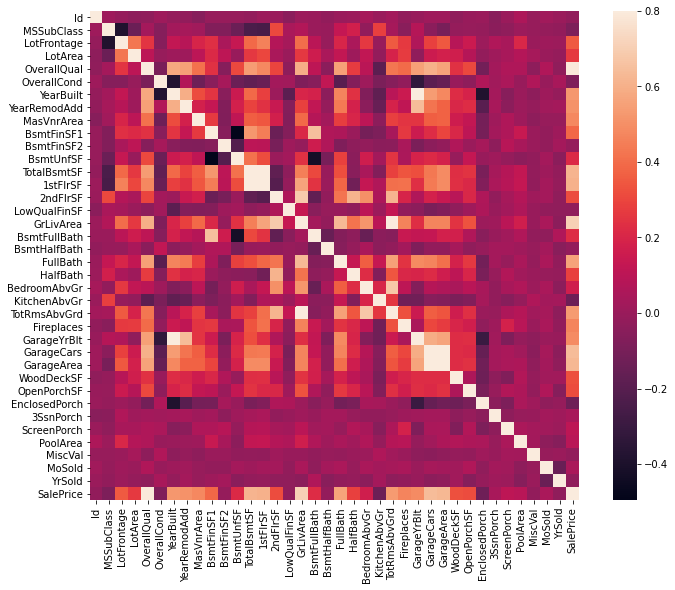

In [10]:
# Correlation Matrix
corrmat=df.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True); 

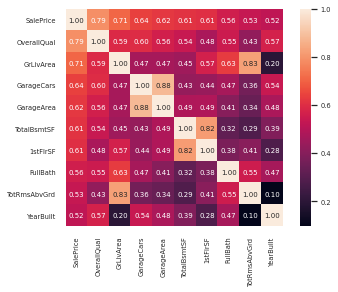

In [16]:
# SalePrice correlation matrix
k=10 # number of variables for heatmap
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=0.6)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':7},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

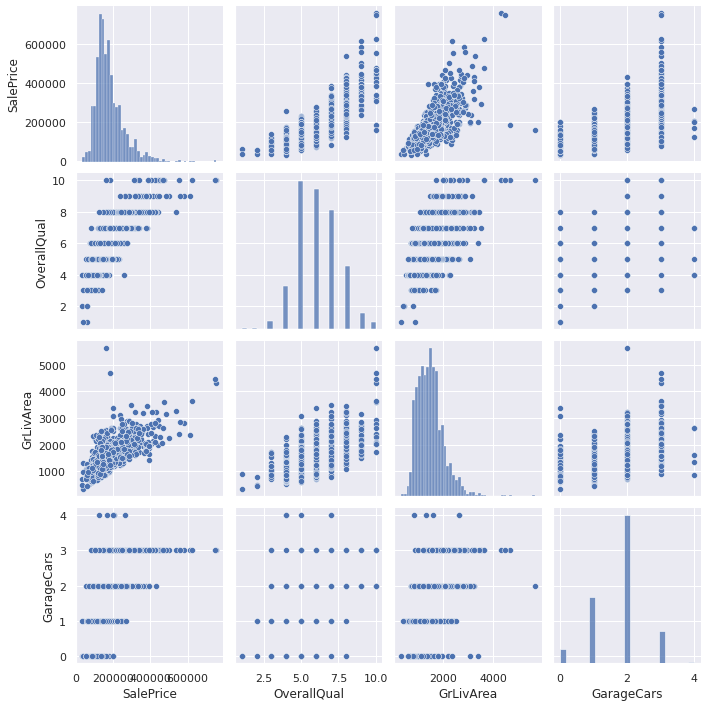

In [17]:
# Scatterplot
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars']
sns.pairplot(df[cols],size=2.5)
plt.show();

Missing Value

In [18]:
# missing data
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
